In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 

In [3]:
warnings.filterwarnings(action = 'ignore')

In [4]:
train = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')

test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

submission = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv')


# test_id = test['Id']-1


# df = pd.concat([train,test])
# df

# 데이터 전처리

* 범주형 변수에서 결측치인 경우는 해당 변수가 없는 경우를 의미함 
* 수치형 변수는 중앙값으로 채워주자 
* 범주형 변수를 더미변수화 시켜주자 

In [5]:
def preprocessing(df):
    
    df = df.drop('Id',axis = 1)
    
    num_cols = df.describe().columns.tolist()
    obj_cols = df.describe(include = 'O').columns.tolist()
    
    for _ in num_cols:
        
        df[_] = df[_].fillna(df[_].median())
    
    for _ in obj_cols:
        df[_] = df[_].fillna('None')
        
    df = pd.get_dummies(df,columns = obj_cols)
 
    return df,num_cols    

In [6]:
df,num_cols= preprocessing(train)
df

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,1,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0,0,0,1,0,0,0,0,1,0
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,0,0,0,1,0,0,0,0,1,0
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,0,0,0,1,0,0,0,0,1,0
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,...,0,0,0,1,0,0,0,0,1,0


<AxesSubplot:>

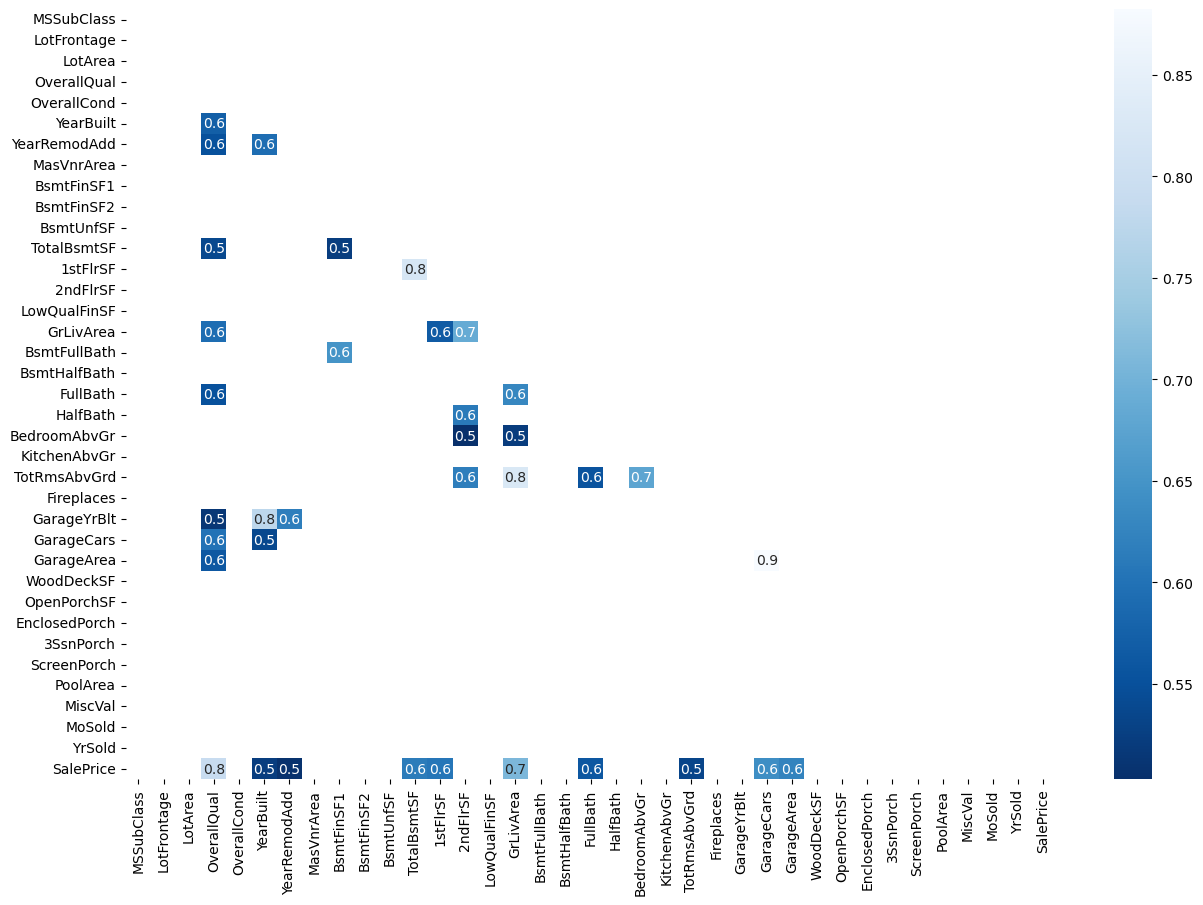

In [7]:
corr = df[num_cols].corr()

mask = np.triu(np.ones_like(corr))

plt.figure(figsize = [15,10])

sns.heatmap(corr[np.abs(corr) > 0.5],annot = True, mask = mask, cmap = 'Blues_r', fmt = '.1g')

# target 인 SalePrice 와 상관관계가 있는 독립변수도 있지만, 독립변수간 다중공선성 문제가 보이는 것들이 많다.

### OLS,Ridge, Lasso 회귀분석의 차이점을 봐보자 

일반적인 회귀분석, 릿지 회귀분석, 라쏘 회귀분석은 모두 선형 회귀분석(linear regression)의 일종으로 데이터셋의 변수들간의 관계를 모델링하는 방법입니다. 그러나 이들 방법은 목적이나 가정, 사용하는 규제(regularization) 방법 등이 서로 다릅니다.

일반적인 회귀분석(Ordinary Least Squares Regression, OLS):
회귀계수를 추정하기 위해, 잔차의 제곱합을 최소화 하는 최소제곱법(Least Squares Method)을 사용합니다. 변수 간의 다중공선성(multicollinearity) 문제가 없을 때, 모델의 정확도가 높은 선형 모델을 만들 수 있습니다. 하지만 변수간 다중공선성이 존재하면, 추정된 계수의 분산이 매우 크게 되어 모델의 예측 능력이 낮아질 수 있습니다.

릿지 회귀분석(Ridge Regression):
OLS와 같이 잔차의 제곱합을 최소화하는 목적을 가지지만, 릿지 회귀분석은 추가적인 규제(regularization)를 적용합니다. 규제항(regularization term)을 잔차의 제곱합에 추가하여, 회귀 계수의 크기가 커지지 않도록 제한합니다. 이를 통해 모델의 일반화 능력을 향상시킬 수 있습니다. 릿지 회귀분석은 변수간 다중공선성 문제가 존재할 경우에도 적용 가능합니다.

라쏘 회귀분석(Lasso Regression):
OLS와 같은 최소제곱법을 사용하며, 릿지 회귀분석과 마찬가지로 규제를 추가합니다. 하지만 라쏘 회귀분석에서는 릿지 회귀분석과 달리, L1 규제(norm)를 사용합니다. 이를 통해 변수 선택(feature selection)이 가능하며, 일부 계수를 0으로 만들어 특정 변수들을 제거할 수 있습니다. 변수간의 상호작용을 고려하지 않고, 특정 변수들만 사용하는 모델을 만들고자 할 때 적용됩니다.

# OLS,Ridge,Lasso의 차이 

In [8]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [9]:
# train = df.iloc[~test_id]

# test = df.iloc[test_id].drop('SalePrice',axis = 1)

In [10]:
x_train,y_train,x_test,y_test = train_test_split(df.drop('SalePrice',axis = 1), df['SalePrice'], test_size = 0.2, random_state = 42)

In [11]:
lm = LinearRegression().fit(x_train,x_test)
ridge = Ridge().fit(x_train,x_test)
lasso = Lasso().fit(x_train,x_test)

### OSL,Redige,Lasso 의 회귀계수의 차이 

Text(0.5, 1.0, 'coefficients of Ridge,Lasso Regression')

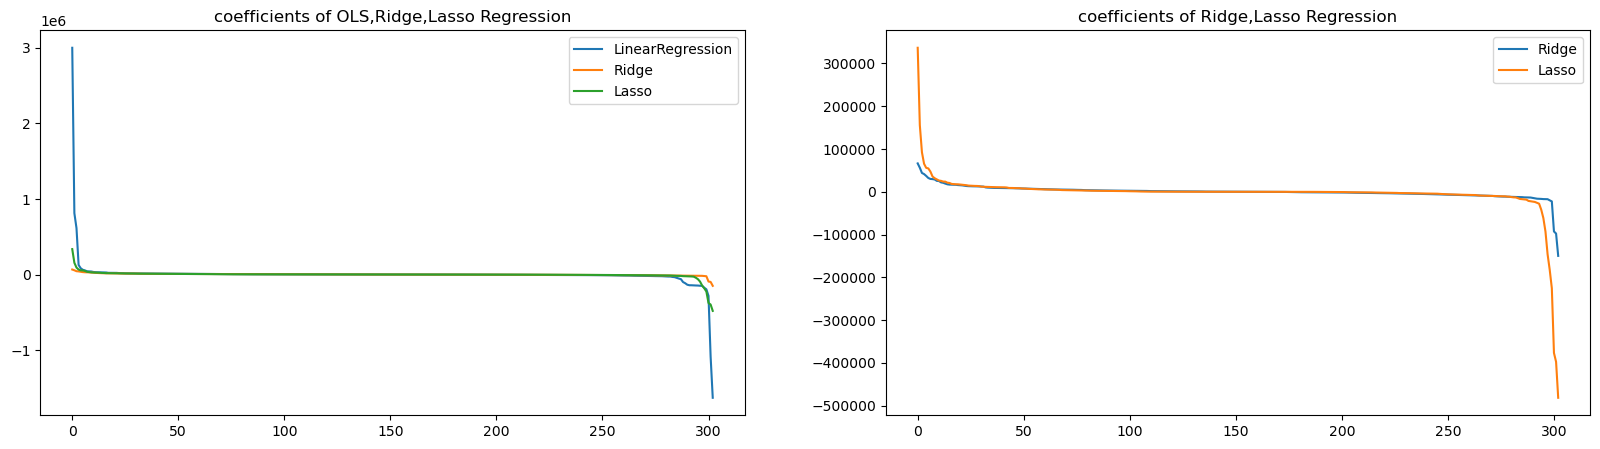

In [12]:
plt.figure(figsize = [20,5])

plt.subplot(1,2,1)

plt.plot(np.sort(lm.coef_)[::-1], label = 'LinearRegression')
plt.plot(np.sort(ridge.coef_)[::-1], label = 'Ridge')
plt.plot(np.sort(lasso.coef_)[::-1], label = 'Lasso')

plt.title("coefficients of OLS,Ridge,Lasso Regression")

plt.legend()

plt.subplot(1,2,2)

plt.plot(np.sort(ridge.coef_)[::-1], label = 'Ridge')
plt.plot(np.sort(lasso.coef_)[::-1], label = 'Lasso')
plt.legend()
plt.title("coefficients of Ridge,Lasso Regression")

* 릿지와 라쏘 회귀분석의 경우 OLS 에 비해 회귀계수의 범위가 크지 않은 모습을 볼 수 있다.
* 이는 L1, L2 penalty 가 있어 회귀계수의 범위가 정해져있기 때문인데, 회귀계수의 범위를 지정함으로서 일반화 성능을 높이는 효과가 있다.
* 일반적으로 다중공선성을 보이고 독립변수가 많은 복잡한 모델일 수록 훈련세트에 대해 오버피팅이 되어, 검증 세트에서는 설명력이 부족한 경우가 많다.

In [13]:
models = [lm,ridge,lasso]

for _ in range(len(models)):
    
    print(models[_],'의 훈련세트에 대한 설명력은 :',r2_score(x_test,models[_].predict(x_train)))
    print(models[_],'의 검증세트에 대한 설명력은 :',r2_score(y_test,models[_].predict(y_train)))
    print('---' * 20)

LinearRegression() 의 훈련세트에 대한 설명력은 : 0.9400854142174659
LinearRegression() 의 검증세트에 대한 설명력은 : 0.44260572606387527
------------------------------------------------------------
Ridge() 의 훈련세트에 대한 설명력은 : 0.9246601400692662
Ridge() 의 검증세트에 대한 설명력은 : 0.8848276611971821
------------------------------------------------------------
Lasso() 의 훈련세트에 대한 설명력은 : 0.9379372150365021
Lasso() 의 검증세트에 대한 설명력은 : 0.8841898538378714
------------------------------------------------------------


* 훈련 세트에 있어서는 일반적인 OLS 모델이 가장 높았으나 검증세트에서는 릿지, 라쏘 회귀분석에 비해서 검증세트에 대한 설명력이 절반 수준인 모습을 볼 수 있다.
* 이는 OLS는 독립변수들간 다중공선성으로 인해 회귀계수의 추정치가 불안정해짐으로써 과적합 문제가 일어나게 되지만
* 릿지의 경우, 다중공선성을 보이는 회귀계수의 추정치를 0에 가깝게 수렴시키거나 라쏘의 경우는 설명력이 약한 변수의 회귀계수를 0으로 만듬으로서 과적합 문제를 피한다

# 릿지, 라쏘 회귀분석의 규제정도에 따른 회귀계수의 변화 

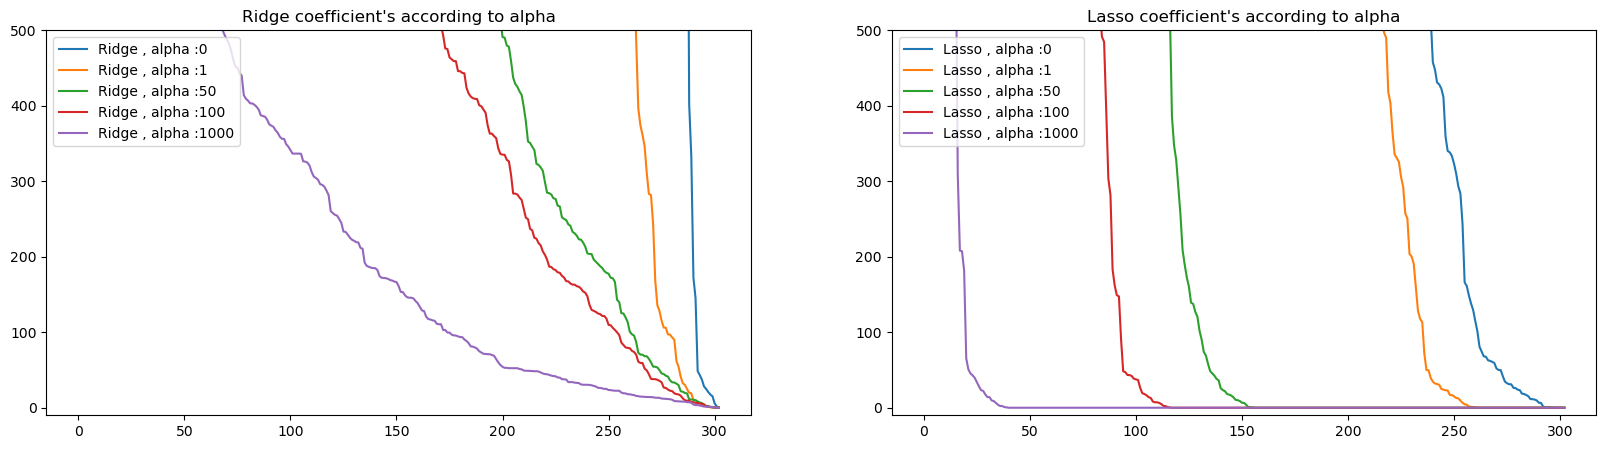

In [14]:
plt.figure(figsize = [20,5])

plt.subplot(1,2,1)

alpha = [0,1,50,100,1000]

for _ in alpha:
    
    model = Ridge(alpha = _)
    
    model.fit(x_train,x_test)
    
    plt.plot(np.sort(np.abs(model.coef_))[::-1], label = f'Ridge , alpha :{_}')
    plt.legend(loc = 'upper left')

    plt.ylim([-10,500])
    plt.title("Ridge coefficient's according to alpha")

plt.subplot(1,2,2)

alpha = [0,1,50,100,1000]

for _ in alpha:
    
    model = Lasso(alpha = _)
    
    model.fit(x_train,x_test)
    
    plt.plot(np.sort(np.abs(model.coef_))[::-1], label = f'Lasso , alpha :{_}')
    plt.legend(loc = 'upper left')

    plt.ylim([-10,500])
    plt.title("Lasso coefficient's according to alpha")


* alpha 값이 클 수록 릿지, 라쏘 모델의 규제가 강력해짐을 알 수 있다.
* Ridge 회귀분석의 경우 alpha 값이 클 수록 회귀계수의 값이 더 작아지는 모습을 알 수 있었다. 하지만 300번째의 회귀계수가 될 때 까지 0에 수렴 할 뿐 0이 되진 않는다.
* 이는 모델이 다중공선성 문제를 해결하기 위해 회귀계수의 값을 스케일링 하지만, 모든 변수를 선택함으로서 모델의 복잡성은 감소하지 못하는 경향이 있음을 의미한다. 

* Lasso 회귀분석의 경우는 alpha 값이 클 수록 사용하는 독립변수의 양이 적어짐을 알 수 있다. 설명력이 약한 변수의 회귀계수를 0으로 설정함으로서 변수 선택 기능이 있다.
* 이는 Lasso 회귀분석은 규제값이 증가함에 따라 모델의 복잡성이 감소함을 알 수 있다.

# 하이퍼 파라미터 찾기 

 * 릿지, 라쏘 회귀분석이 일반 OLS 보다 높다는 사실은 알았으니 릿지와 라쏘 회귀분석을 사용하자 
 * 규제값을 찾기 위해 반복문을 통해 가장 정확도가 가장 높게 나오는 규제값과 모델을 선택하자 

In [15]:
from sklearn.model_selection import cross_val_score

alpha = np.arange(0,1000,10)

ridge_avg_score = []
lasso_avg_score = []

for _ in alpha:
    
    ridge = Ridge(alpha = _)
    ridge_score = cross_val_score(ridge , df.drop('SalePrice',axis = 1), df['SalePrice'], cv = 5)
    ridge_avg_score.append(np.mean(ridge_score))
    
    lasso = Lasso(alpha = _)
    lasso_score = cross_val_score(lasso, df.drop('SalePrice',axis = 1), df['SalePrice'], cv = 5)
    lasso_avg_score.append(np.mean(lasso_score))

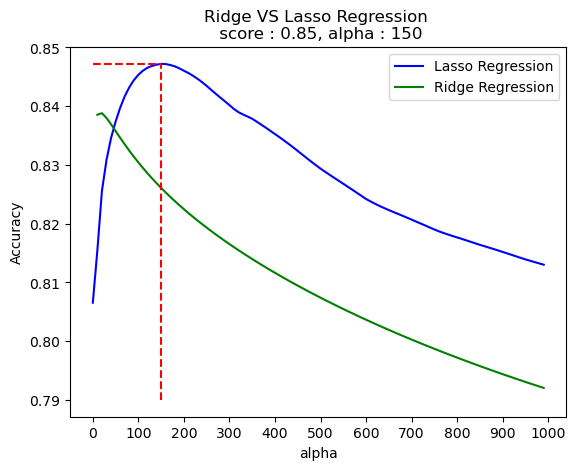

In [16]:
idx = np.argmax(lasso_avg_score)

plt.plot(alpha,lasso_avg_score, label = 'Lasso Regression', c = 'blue')
plt.plot(alpha[1:],ridge_avg_score[1:], label = 'Ridge Regression', c = 'green')

plt.plot([0,alpha[idx]],[lasso_avg_score[idx],lasso_avg_score[idx]], 'r--')
plt.plot([alpha[idx],alpha[idx]],[0.79,lasso_avg_score[idx]], 'r--')

plt.title(f'Ridge VS Lasso Regression \n score : {round(lasso_avg_score[idx],2)}, alpha : {alpha[idx]}')

plt.legend()



plt.ylabel('Accuracy')
plt.xlabel('alpha')

plt.xticks(ticks = np.arange(0,1100,100));

### Cross Validation 을 통해 찾은 최적의 모델은 Lasso Regression 이였으며, 규제값은 150으로 나타났다.